<a href="https://colab.research.google.com/github/bryandaetz1/Apartment_Rent_Prices/blob/master/Apartment_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
oak = pd.read_csv('https://raw.githubusercontent.com/bryandaetz1/Apartment_Rent_Prices/master/oakland_apartment_data.csv')
sf = pd.read_csv('https://raw.githubusercontent.com/bryandaetz1/Apartment_Rent_Prices/master/san_francisco_apartment_data.csv')
sj = pd.read_csv('https://raw.githubusercontent.com/bryandaetz1/Apartment_Rent_Prices/master/san_jose_apartment_data.csv')

df = pd.concat([oak,sf,sj], axis = 0, sort = False)

In [3]:
df.shape

(12470, 8)

In [4]:
df.head()

,Title,Address,Bedrooms,Bathrooms,Rent,Square Footage,Availability,Amenities
0,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1 Bed,1 Bath,"$2,875 - 2,995",502 Sq Ft,Available Now,"100% Smoke Free Community, Air Conditioning, B..."
1,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1 Bed,1 Bath,"$2,875",502 Sq Ft,Available Now,"100% Smoke Free Community, Air Conditioning, B..."
2,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1 Bed,1 Bath,"$2,875",502 Sq Ft,Available Now,"100% Smoke Free Community, Air Conditioning, B..."
3,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1 Bed,1 Bath,"$2,875",502 Sq Ft,Available Now,"100% Smoke Free Community, Air Conditioning, B..."
4,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1 Bed,1 Bath,"$2,875",502 Sq Ft,Available Now,"100% Smoke Free Community, Air Conditioning, B..."


In [5]:
df.isna().sum()

Title               0
Address             0
Bedrooms            0
Bathrooms           9
Rent                0
Square Footage    375
Availability        0
Amenities         297
dtype: int64

In [7]:
#replacing null values in amenities column with empty strings, will address null values in bathrooms and square footage columns later
df['Amenities'].fillna('', inplace = True)

#Cleaning Bedroom and Bathroom Columns

In [8]:
df.Bedrooms.value_counts()

1 Bed     5062
2 BRs     4663
Studio    1705
3 BRs      836
4 BRs      160
5 BRs       29
6 BRs       10
8 BRs        2
13 BRs       1
7 BRs        1
12 BRs       1
Name: Bedrooms, dtype: int64

In [9]:
df.Bathrooms.value_counts()

1 Bath       7319
2 Baths      4350
1½ Baths      216
2½ Baths      176
3 Baths       161
2Â½ Baths      98
1Â½ Baths      69
3½ Baths       33
4 Baths        14
0Â½ Baths       7
4½ Baths        4
4Â½ Baths       4
0½ Baths        3
5½ Baths        2
5Â½ Baths       1
3Â½ Baths       1
17 Baths        1
3¼ Baths        1
10 Baths        1
Name: Bathrooms, dtype: int64

In [10]:
# replacing Studio with 0 bedrooms and removing all non-digits from Bedrooms column
df.Bedrooms = pd.to_numeric(df.Bedrooms.str.replace('Studio','0').str.replace('\D','', regex = True))

# converting fractions to decimals and removing all letters from Bathrooms column
df.Bathrooms = pd.to_numeric(df.Bathrooms.str.replace('½','.5').str.replace('¼','.25').str.replace('Â','').str.replace('[a-zA-z]','', regex = True).str.strip())


In [11]:
df.Bedrooms.value_counts()

1     5062
2     4663
0     1705
3      836
4      160
5       29
6       10
8        2
7        1
13       1
12       1
Name: Bedrooms, dtype: int64

In [12]:
df.Bathrooms.value_counts()

1.00     7319
2.00     4350
1.50      285
2.50      274
3.00      161
3.50       34
4.00       14
0.50       10
4.50        8
5.50        3
3.25        1
17.00       1
10.00       1
Name: Bathrooms, dtype: int64

In [13]:
#inspecting rows where number of bathrooms is missing
df.loc[df['Bathrooms'].isna()]

,Title,Address,Bedrooms,Bathrooms,Rent,Square Footage,Availability,Amenities
2458,Aqua Via,"125 2nd St, Oakland, CA 94607 â€“ Jack London ...",0,NaN,"$2,598 - 5,359",790 Sq Ft,26-Oct,"Air Conditioning in Every Home, Award-Winning ..."
2459,Aqua Via,"125 2nd St, Oakland, CA 94607 â€“ Jack London ...",0,NaN,"$2,598 - 5,359",790 Sq Ft,26-Oct,"Air Conditioning in Every Home, Award-Winning ..."
2975,One Henry Adams,"1 Henry Adams St, San Francisco, CA 94103 – Po...",1,NaN,Call for Rent,651 Sq Ft,Not Available,"Courtyard, High Speed Internet Access, Roommat..."
3788,FOUND Study Nob Hill,"851 California St, San Francisco, CA 94108 – C...",1,NaN,"$1,300 - 1,650",NaN,Available Now,"Furnished, Built in 1910, 80 Units/4 Stories, ..."
3789,FOUND Study Nob Hill,"851 California St, San Francisco, CA 94108 – C...",1,NaN,"$1,300",NaN,Available Now,"Furnished, Built in 1910, 80 Units/4 Stories, ..."
3790,FOUND Study Nob Hill,"851 California St, San Francisco, CA 94108 – C...",1,NaN,"$1,650",NaN,Available Now,"Furnished, Built in 1910, 80 Units/4 Stories, ..."
3791,FOUND Study Nob Hill,"851 California St, San Francisco, CA 94108 – C...",1,NaN,"$1,650",NaN,Available Now,"Furnished, Built in 1910, 80 Units/4 Stories, ..."
3792,FOUND Study Nob Hill,"851 California St, San Francisco, CA 94108 – C...",1,NaN,"$1,650",NaN,Available Now,"Furnished, Built in 1910, 80 Units/4 Stories, ..."
3982,1801 15th St,"1801 15th St, San Francisco, CA 94103 – Missio...",0,NaN,Call for Rent,NaN,Available Soon,"Built in 1924, 9 Units/3 Stories"


In [14]:
# only 9 apartments don't have bathrooms listed and they are all either studios are 1 bedrooms, assuming this means 1 Bathroom
df['Bathrooms'].fillna(1, inplace = True)

# Extracting Features from Address Column

In [15]:
#most addresses have a special symbol â€“ that will make them easy to split, but that's not the case for all of them
#inspecting addresses without this symbol
df.Address.loc[df['Address'].str.contains('â€“') == False]

0       150 Van Ness Ave, San Francisco, CA 94102 – Ci...
1       150 Van Ness Ave, San Francisco, CA 94102 – Ci...
2       150 Van Ness Ave, San Francisco, CA 94102 – Ci...
3       150 Van Ness Ave, San Francisco, CA 94102 – Ci...
4       150 Van Ness Ave, San Francisco, CA 94102 – Ci...
                              ...                        
4620    3092 Manuel St, San Jose, CA 95136 – South San...
4621     3420 Borge Ct, San Jose, CA 95132 – Upper Sierra
4622        376 N 20th St, San Jose, CA 95112 – Northside
4623       776 Deland Ave, San Jose, CA 95128 – Rose Glen
4624       776 Deland Ave, San Jose, CA 95128 – Rose Glen
Name: Address, Length: 9230, dtype: object

In [16]:
#extracting city from address and saving it as a new column
df['City'] = df.Address.apply(lambda x: x.split(', CA')[0]).apply(lambda x: x.split(',')[-1]).str.strip()

In [17]:
df['City'].value_counts()

San Francisco    4553
San Jose         3632
Oakland          2446
Milpitas          369
Berkeley          333
Emeryville        311
Santa Clara       269
Campbell          178
Cupertino         137
Alameda            99
Daly City          52
San Leandro        37
Sunnyvale          26
Piedmont           14
Los Gatos          13
Saratoga            1
Name: City, dtype: int64

In [18]:
#extracting zip code from address and storing this as a new column
df['Zip_Code'] = df.Address.apply(lambda x: x.split('CA')[-1]).apply(lambda x: x.split('â€“')[0] if 'â€“' in str(x) else x.split('–')[0]).str.strip()

In [19]:
df['Zip_Code'].value_counts()

94612    1347
94107    1041
94105     850
94103     799
95134     658
         ... 
94127       3
94104       2
95139       2
94708       1
95070       1
Name: Zip_Code, Length: 89, dtype: int64

In [20]:
#extracting neighborhood from address and storing this as a new column
df['Neighborhood'] = df.Address.apply(lambda x: x.split('â€“')[-1] if 'â€“' in str(x) else x.split('–')[-1]).str.strip()

In [21]:
#finding neighborhoods that appear most frequently repeatedly
top_neighborhoods = df['Neighborhood'].value_counts()
top_neighborhoods[top_neighborhoods > 50]

Mission Bay                  723
Lakeside                     669
North San Jose               547
Rincon                       543
Northside                    467
SoMa                         359
Uptown Oakland               346
Emeryville                   294
Westlake                     283
Potrero                      263
Dogpatch                     245
Santa Clara                  242
Mission                      241
South Market                 218
Civic Center                 217
Milpitas                     205
Santa Teresa                 202
San Francisco                176
South Beach                  176
Lower Haight                 175
Jack London Square           172
Rincon Hill                  153
South Berkeley               146
Financial District           142
Pill Hill                    139
Oakland                      139
Buena Vista                  134
Westwood Park                131
Shafter                      123
River Oaks                   123
Lower Paci

#Cleaning Rent Column

In [22]:
#testing to see how many listings have a range for rent 
print('Number of Listings with Rent Range:', len(df[df['Rent'].str.contains('-')]))
print('Number of Listings with No Rent Listed:', len(df[df['Rent'].str.contains('Call')]))


Number of Listings with Rent Range: 4525
Number of Listings with No Rent Listed: 1746


In [23]:
# dropping rows where rent isn't listed
df.drop(df.loc[df['Rent'].str.contains('Call')].index, axis = 0, inplace = True)

#removing dollar signs, commas and / Person from rent column
df['Rent'] = df['Rent'].str.replace('$','').str.replace(',','').str.replace('/ Person','')

In [24]:
df.shape

(8124, 11)

In [25]:
# creating new column with average rents for listings where there is a rent range, and the rent amount for listings with just one rent amount
avg_rent = []
for x in df['Rent']:
  if '-' in x:
    avg = round((int(x.split('-')[0]) + int(x.split('-')[-1])) / 2)  #rounding up since rent prices generally don't include decimals
    avg_rent.append(avg)
  else:
    avg_rent.append(x)

df['Avg_Rent'] = pd.to_numeric(avg_rent)

In [26]:
#making sure this worked
df.loc[df['Rent'].str.contains('-'), ['Rent','Avg_Rent']].head(10)

,Rent,Avg_Rent
0,2875 - 2995,2935
65,3230 - 3245,3238
68,3495 - 3520,3508
83,2555 - 2783,2669
88,2577 - 2827,2702
90,2631 - 3107,2869
99,2755 - 3217,2986
107,2884 - 3053,2968
108,2884 - 2938,2911
109,2894 - 2948,2921


#Cleaning Square Footage Column

In [27]:
df.isna().sum()

Title               0
Address             0
Bedrooms            0
Bathrooms           0
Rent                0
Square Footage    192
Availability        0
Amenities           0
City                0
Zip_Code            0
Neighborhood        0
Avg_Rent            0
dtype: int64

In [28]:
#removing letters, commas and extra whitespace from square footage column
df['Square Footage'] = df['Square Footage'].str.replace('[a-zA-z]','',regex = True).str.replace(',','').str.strip()

In [29]:
# creating new column with average square footage for listings where there is a sqft range, and the square footage for listings with just one sqft amount
avg_sqft = []
for x in df['Square Footage']:
  if '-' in str(x):
    avg = round((int(x.split('-')[0]) + int(x.split('-')[-1])) / 2)
    avg_sqft.append(avg)
  else:
    avg_sqft.append(x)
df['Avg_Sqft'] = pd.to_numeric(avg_sqft)


In [30]:
#making sure this worked
df.loc[df['Square Footage'].str.contains('-', na=False), ['Square Footage','Avg_Sqft']].head(10)

,Square Footage,Avg_Sqft
164,455 - 469,462.0
171,530 - 601,566.0
177,676 - 721,698.0
201,526 - 570,548.0
202,526 - 570,548.0
203,526 - 570,548.0
204,610 - 721,666.0
205,610 - 721,666.0
206,526 - 572,549.0
207,526 - 572,549.0


In [31]:
#getting a sense of how many missing square footage values there are for each bedroom size
df.loc[df['Avg_Sqft'].isna()]['Bedrooms'].value_counts()

1    59
2    50
0    40
3    31
4    10
7     1
6     1
Name: Bedrooms, dtype: int64

In [32]:
#getting average square footage by bedroom size
averages = round(df.groupby('Bedrooms', as_index = False)['Avg_Sqft'].mean())
averages

,Bedrooms,Avg_Sqft
0,0,496.0
1,1,718.0
2,2,1114.0
3,3,1518.0
4,4,1899.0
5,5,2318.0
6,6,1430.0
7,7,NaN
8,8,3300.0
9,12,2200.0


In [33]:
#replacing null values in Avg_Sqft column with average square footage for the same bedroom size
for i in range (0,7):
  df.loc[(df['Avg_Sqft'].isna()) & (df['Bedrooms'] == i),'Avg_Sqft'] = averages['Avg_Sqft'][i]

In [34]:
# dropping rows where bedroom size is 7 or higher, these are outliers anyway and it will address the missing square footage value for the one 7 bedroom home/apartment that we have
df.drop(df.loc[df['Bedrooms'] >= 7].index, axis = 0, inplace = True)

In [35]:
#verifying that null values were successfully replaced
df.Avg_Sqft.isna().sum()

0

# NLP Model for Amenities Column
Trying to see if training an NLP model using the bag of words approach will help gain insight on useful features to extract from the Amenities column.

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

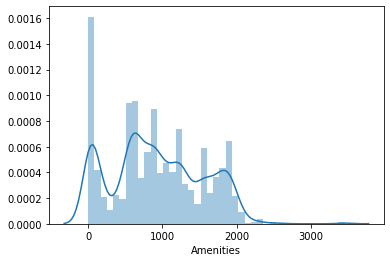

In [37]:
#plotting length of amenities descriptions
length = df['Amenities'].str.len()
sns.distplot(length)
plt.show()

In [38]:
#getting set of English stopwords
stopword_set = set(stopwords.words('english'))

#NLP processing
lemma = WordNetLemmatizer()

In [39]:
#clean the raw text
amenities_text = []
for amenity in df['Amenities']:
  text = re.sub('[^a-zA-z]'," ", str(amenity))
  text = text.lower()
  text = word_tokenize(text, language = 'english')
  text = [lemma.lemmatize(word) for word in text if(word) not in stopword_set]
  text = ' '.join(text)
  amenities_text.append(text)

amenities_text[:10]

['smoke free community air conditioning bicycle storage brand new luxury living controlled access courtyard firepit dog washing station elevator fiber internet gourmet kitchen home full size washer dryer individual climate control minute great shopping amp dining motorized parking lift motorized parking lift noise reducing dual pane window noise reducing insulated dual pane window package locker pet allowed pet welcome weight restriction plank flooring quartz countertop quartz counter top tile backsplash rooftop terrace barbecue rooftop terrace downtown view secure bike parking stainless steel appliance sweeping view oakland hill sweeping view san francisco view sf oakland deposit monthly pet rent lb weight limit pet limit built unit story month month month month month month month month month month month month month month month month maintenance site online service pet care pet washing station public transportation elevator multi use room roof terrace sundeck courtyard grill patio gril

In [40]:
#create the bag of words model
cv = CountVectorizer(max_features = 1500)
amenities = cv.fit_transform(amenities_text).toarray()

#covert amenities to dataframe
amenities = pd.DataFrame(amenities, columns = cv.get_feature_names())
amenities.head()

,abundant,ac,academic,accent,acceptance,accepted,accepts,access,accessible,accommodate,acre,across,activity,ada,additional,adjacent,adjustable,advantage,aerobic,aerobics,air,airport,airy,alameda,alarm,alcove,alexa,alfred,alfresco,allowed,alone,amazing,amazon,amenity,amp,ample,amtrak,apartment,apartmentratings,app,...,westfield,wet,wheel,wheelchair,whirlpool,white,whole,wi,wide,wifi,william,willow,window,wine,winning,wired,wireless,wiring,within,wood,woodstyle,wool,work,working,workshop,workspace,workstation,worthy,woven,wright,xfinity,yard,year,yelena,yoga,zen,zip,zipcar,zipcars,zone
0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
#setting target variable and independent variables and splitting dataset for NLP model
y = pd.to_numeric(df['Avg_Rent'])
X = pd.concat([amenities.reset_index(drop = True), df['Bedrooms'].reset_index(drop = True)], axis = 1, sort = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [46]:
# choosing to use random forest regression model because it's easy to see feature importances
rf = RandomForestRegressor(n_estimators = 100)

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [47]:
#calculating root mean squared error 
print('Random Forest Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

#calulating R**2 score
print('Random Forest R**2 Score:', r2_score(y_test, pred))

Random Forest Root Mean Squared Error: 775.1837634207167
Random Forest R**2 Score: 0.7003323317126089


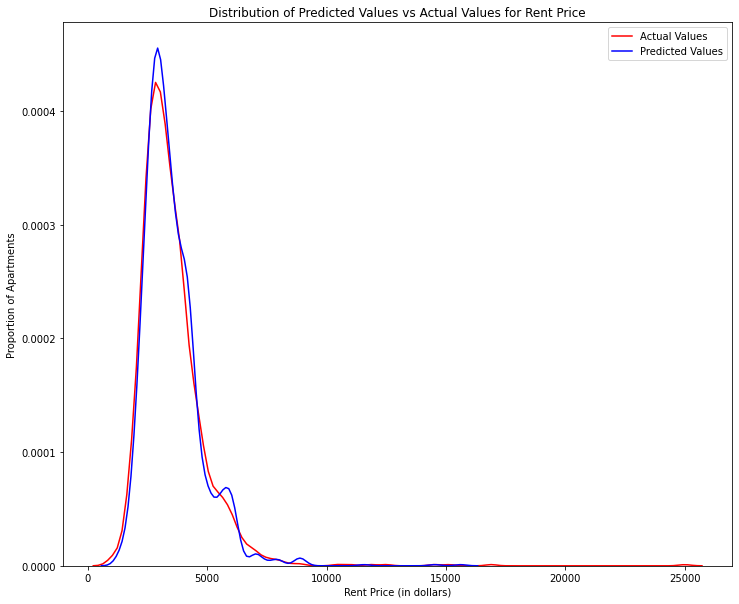

In [48]:
# visualizing distribution of predicted values vs actual values for SalePrice
plt.figure(figsize = (12,10))

ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'Actual Values')
ax2 = sns.distplot(pred, hist = False, color = 'b', label = 'Predicted Values')



plt.title('Distribution of Predicted Values vs Actual Values for Rent Price')
plt.xlabel('Rent Price (in dollars)')
plt.ylabel('Proportion of Apartments')

plt.show()
plt.close()

In [49]:
#getting feature importances
feature_importances = ({'Name':[],
                        'Score':[]})

for name, score in zip(X.columns, rf.feature_importances_):
  feature_importances['Name'].append(name)
  feature_importances['Score'].append(score)

feature_importances = pd.DataFrame(feature_importances).sort_values(['Score'], ascending = False)

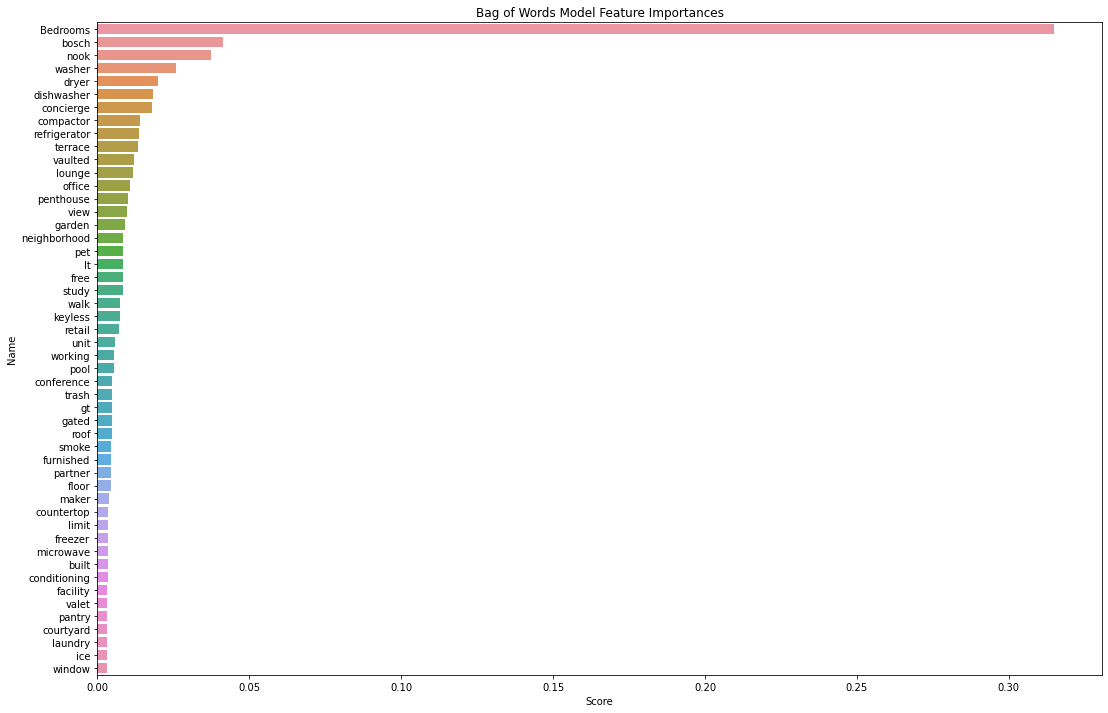

In [50]:
#plotting feature importances
f, ax = plt.subplots(figsize = (18,12))
sns.barplot(x = 'Score', y = 'Name', data = feature_importances.head(50), orient = "h")
plt.title('Bag of Words Model Feature Importances')
plt.show()

#Extracting Features from Amenities Column
Used insight gained from NLP model to extract new features from the amenities column

In [51]:
#whether or not apartment has Bosch appliances
df['Bosch_Appliances'] = df.Amenities.apply(lambda x: 1 if 'bosch' in x.lower() else 0 )
df.Bosch_Appliances.value_counts()

0    7772
1     342
Name: Bosch_Appliances, dtype: int64

In [52]:
#whether the unit has stainless steel appliances
df['Stainless_Steel_App'] = df.Amenities.apply(lambda x: 1 if 'stainless steel appliances' in x.lower()
                                                              or 'appliances stainless' in x.lower()
                                                              or 'stainless-steel appliances' in x.lower()
                                                              else 0)
df.Stainless_Steel_App.value_counts()

0    4431
1    3683
Name: Stainless_Steel_App, dtype: int64

In [53]:
#whether or not apt has a dishwasher
df['Dishwasher'] = df.Amenities.apply(lambda x: 1 if 'dishwasher' in x.lower() else 0)
df.Dishwasher.value_counts()

1    5467
0    2647
Name: Dishwasher, dtype: int64

In [54]:
#whether or not the apt has a microwave
df['Microwave'] = df.Amenities.apply(lambda x: 1 if 'microwave' in x.lower() else 0)
df.Microwave.value_counts()

1    4323
0    3791
Name: Microwave, dtype: int64

In [55]:
#whether or not laundry is mentioned in the list of amenities
df['Laundry'] = df.Amenities.apply(lambda x: 1 if 'laundry' in x.lower() or 'washer' in x.lower() or 'dryer' in x.lower() else 0)
df.Laundry.value_counts()

1    7367
0     747
Name: Laundry, dtype: int64

In [56]:
#whether or not there is a washer and dryer in the unit
df['Washer/Dryer_in_unit'] = df.Amenities.apply(lambda x: 1 if 'washer/dryer - in unit' in x.lower() 
                                                                or 'washer/dryer in unit' in x.lower() 
                                                                or 'washer and dryer in unit' in x.lower()
                                                                or 'in home washer/dryer' in x.lower()
                                                                or 'in home washer and dryer' in x.lower()
                                                                or 'in home full-size washer and dryer' in x.lower()
                                                                else 0)
df['Washer/Dryer_in_unit'].value_counts()

1    4545
0    3569
Name: Washer/Dryer_in_unit, dtype: int64

In [57]:
#whether the apt/home has a terrace
df['Terrace'] = df.Amenities.apply(lambda x: 1 if 'terrace' in x.lower() else 0)
df.Terrace.value_counts()

0    5389
1    2725
Name: Terrace, dtype: int64

In [58]:
#whether the apt/home has a balcony
df['Balcony'] = df.Amenities.apply(lambda x: 1 if 'balcony' in x.lower() else 0)
df.Balcony.value_counts()

1    4642
0    3472
Name: Balcony, dtype: int64

In [59]:
#whether or not the apt/home has vaulted ceilings
df['Vaulted_Ceilings'] = df.Amenities.apply(lambda x: 1 if 'vaulted ceiling' in x.lower() else 0)
df.Vaulted_Ceilings.value_counts()

0    6557
1    1557
Name: Vaulted_Ceilings, dtype: int64

In [60]:
#whether the apt/home has a garden
df['Garden'] = df.Amenities.apply(lambda x: 1 if 'garden' in x.lower() else 0)
df.Garden.value_counts()

0    7065
1    1049
Name: Garden, dtype: int64

In [61]:
#whether or not the apt is a penthouse
df['Penthouse'] = df.Amenities.apply(lambda x: 1 if 'penthouse' in x.lower() else 0)
df.Penthouse.value_counts()

0    7473
1     641
Name: Penthouse, dtype: int64

In [62]:
#whether or not apartment complex has a concierge
df['Concierge'] = df.Amenities.apply(lambda x: 1 if 'concierge' in x.lower() else 0) 
df.Concierge.value_counts()

0    6098
1    2016
Name: Concierge, dtype: int64

In [63]:
#whether or not apartment complex has a lounge
df['Lounge'] = df.Amenities.apply(lambda x: 1 if 'lounge' in x.lower() or 'game room' in x.lower() or 'clubhouse' in x.lower() else 0)
df.Lounge.value_counts()

1    5543
0    2571
Name: Lounge, dtype: int64

In [64]:
#whether or not apt/house has air conditioning
df['A/C'] = df.Amenities.apply(lambda x: 1 if 'air conditioning' in x.lower() or 'a/c' in x.lower() else 0) 
df['A/C'].value_counts()

0    4616
1    3498
Name: A/C, dtype: int64

In [65]:
#whether or not the apartment complex is smoke free
df['Smoke_Free'] = df.Amenities.apply(lambda x: 1 if 'smoke free' in x.lower() or 'no smoking' in x.lower() else 0)
df.Smoke_Free.value_counts()

0    4227
1    3887
Name: Smoke_Free, dtype: int64

In [66]:
#whether or not the apartment complex allows pets
df['Pets_Allowed'] = df.Amenities.apply(lambda x: 1 if ('pets allowed' in x.lower() or 'pets welcome' in x.lower() or 'dogs allowed' in x.lower() or 'cats allowed' in x.lower()) 
                                                    and ('no pets allowed' not in x.lower() and 'no dogs allowed' not in x.lower() and 'no cats allowed' not in x.lower()) 
                                                    else 0)
df.Pets_Allowed.value_counts()

0    7226
1     888
Name: Pets_Allowed, dtype: int64

In [67]:
#whether or not the apartment complex has a pool
df['Pool'] = df.Amenities.apply(lambda x: 1 if 'pool' in x.lower() else 0)
df.Pool.value_counts()

1    4210
0    3904
Name: Pool, dtype: int64

In [68]:
#whether or not the apartment complex has a gym/fitness center/yoga studio
df['Gym'] = df.Amenities.apply(lambda x: 1 if 'gym' in x.lower() or 'fitness center' in x.lower() or 'yoga studio' in x.lower() else 0) 
df.Gym.value_counts()

1    5603
0    2511
Name: Gym, dtype: int64

In [69]:
#whether or not the apt/house is in a gated community
df['Gated'] = df.Amenities.apply(lambda x: 1 if 'gated' in x.lower() else 0)
df.Gated.value_counts()

0    5331
1    2783
Name: Gated, dtype: int64

In [70]:
#whether the apt/house is furnished
df['Furnished'] = df.Amenities.apply(lambda x: 1 if 'furnished' in x.lower() else 0)
df.Furnished.value_counts()

0    6439
1    1675
Name: Furnished, dtype: int64

In [71]:
#whether the apt/house has a garage
df['Garage'] = df.Amenities.apply(lambda x: 1 if 'garage' in x.lower() else 0)
df.Garage.value_counts()

0    7140
1     974
Name: Garage, dtype: int64

In [72]:
#whether or not the apartment is wheelchair accessible
df['Wheelchair_Accessible'] = df.Amenities.apply(lambda x: 1 if 'wheelchair accessible' in x.lower() else 0)
df.Wheelchair_Accessible.value_counts()

0    6444
1    1670
Name: Wheelchair_Accessible, dtype: int64

In [73]:
#creating features for the type of floor
df['Carpet'] = df.Amenities.apply(lambda x: 1 if 'carpet' in x.lower() else 0)
df['Wood Floor'] = df.Amenities.apply(lambda x: 1 if 'wood floor' in x.lower() else 0)
df['Plank Floor'] = df.Amenities.apply(lambda x: 1 if 'plank floor' in x.lower() else 0)
df['Tile Floor'] = df.Amenities.apply(lambda x: 1 if 'tile floor' in x.lower() else 0)

df[['Carpet','Wood Floor','Plank Floor','Tile Floor']].sum()

Carpet         2276
Wood Floor     3449
Plank Floor     844
Tile Floor     1012
dtype: int64

In [74]:
df.head()

,Title,Address,Bedrooms,Bathrooms,Rent,Square Footage,Availability,Amenities,City,Zip_Code,Neighborhood,Avg_Rent,Avg_Sqft,Bosch_Appliances,Stainless_Steel_App,Dishwasher,Microwave,Laundry,Washer/Dryer_in_unit,Terrace,Balcony,Vaulted_Ceilings,Garden,Penthouse,Concierge,Lounge,A/C,Smoke_Free,Pets_Allowed,Pool,Gym,Gated,Furnished,Garage,Wheelchair_Accessible,Carpet,Wood Floor,Plank Floor,Tile Floor
0,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1,1.0,2875 - 2995,502,Available Now,"100% Smoke Free Community, Air Conditioning, B...",Oakland,94609,Pill Hill,2935,502.0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0
1,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1,1.0,2875,502,Available Now,"100% Smoke Free Community, Air Conditioning, B...",Oakland,94609,Pill Hill,2875,502.0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0
2,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1,1.0,2875,502,Available Now,"100% Smoke Free Community, Air Conditioning, B...",Oakland,94609,Pill Hill,2875,502.0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0
3,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1,1.0,2875,502,Available Now,"100% Smoke Free Community, Air Conditioning, B...",Oakland,94609,Pill Hill,2875,502.0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0
4,Amelia,"411 29th St, Oakland, CA 94609 â€“ Pill Hill",1,1.0,2875,502,Available Now,"100% Smoke Free Community, Air Conditioning, B...",Oakland,94609,Pill Hill,2875,502.0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0


In [75]:
df.columns.tolist()

['Title',
 'Address',
 'Bedrooms',
 'Bathrooms',
 'Rent',
 'Square Footage',
 'Availability',
 'Amenities',
 'City',
 'Zip_Code',
 'Neighborhood',
 'Avg_Rent',
 'Avg_Sqft',
 'Bosch_Appliances',
 'Stainless_Steel_App',
 'Dishwasher',
 'Microwave',
 'Laundry',
 'Washer/Dryer_in_unit',
 'Terrace',
 'Balcony',
 'Vaulted_Ceilings',
 'Garden',
 'Penthouse',
 'Concierge',
 'Lounge',
 'A/C',
 'Smoke_Free',
 'Pets_Allowed',
 'Pool',
 'Gym',
 'Gated',
 'Furnished',
 'Garage',
 'Wheelchair_Accessible',
 'Carpet',
 'Wood Floor',
 'Plank Floor',
 'Tile Floor']

In [76]:
#decided to keep the raw text Amenities column in the dataset in case I decide to extract any additional information from in during the EDA process
df_clean = df.drop(['Title','Address','Rent','Square Footage','Availability'], axis =1)

In [77]:
df_clean.isna().sum()

Bedrooms                 0
Bathrooms                0
Amenities                0
City                     0
Zip_Code                 0
Neighborhood             0
Avg_Rent                 0
Avg_Sqft                 0
Bosch_Appliances         0
Stainless_Steel_App      0
Dishwasher               0
Microwave                0
Laundry                  0
Washer/Dryer_in_unit     0
Terrace                  0
Balcony                  0
Vaulted_Ceilings         0
Garden                   0
Penthouse                0
Concierge                0
Lounge                   0
A/C                      0
Smoke_Free               0
Pets_Allowed             0
Pool                     0
Gym                      0
Gated                    0
Furnished                0
Garage                   0
Wheelchair_Accessible    0
Carpet                   0
Wood Floor               0
Plank Floor              0
Tile Floor               0
dtype: int64

In [78]:
df_clean.shape

(8114, 34)

In [79]:
# un-comment to save cleaned dataframe to csv
#df_clean.to_csv('apartment_data_clean.csv', index = False)